# Pumpkins Linear Regression

In [68]:
# libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import model_selection ,feature_selection, linear_model

In [69]:
pumpkins = pd.read_csv('US-pumpkins.csv')

pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [70]:
# as we getting there are lot of missing values

pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [71]:
pumpkins.columns

Index(['City Name', 'Type', 'Package', 'Variety', 'Sub Variety', 'Grade',
       'Date', 'Low Price', 'High Price', 'Mostly Low', 'Mostly High',
       'Origin', 'Origin District', 'Item Size', 'Color', 'Environment',
       'Unit of Sale', 'Quality', 'Condition', 'Appearance', 'Storage', 'Crop',
       'Repack', 'Trans Mode', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [72]:
no_missing_features = []

for feature in pumpkins.columns:
    if pumpkins[feature].isnull().sum() == 0 :
        no_missing_features.append(feature)

print(no_missing_features)

['City Name', 'Package', 'Date', 'Low Price', 'High Price', 'Repack']


In [73]:
new_columns = ['Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price', 'Date']

pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis =1)

In [74]:
pumpkins

,City Name,Package,Variety,Date,Low Price,High Price
0,BALTIMORE,24 inch bins,NaN,4/29/17,270.00,280.00
1,BALTIMORE,24 inch bins,NaN,5/6/17,270.00,280.00
2,BALTIMORE,24 inch bins,HOWDEN TYPE,9/24/16,160.00,160.00
3,BALTIMORE,24 inch bins,HOWDEN TYPE,9/24/16,160.00,160.00
4,BALTIMORE,24 inch bins,HOWDEN TYPE,11/5/16,90.00,100.00
...,...,...,...,...,...,...
1752,ST. LOUIS,22 lb cartons,MINIATURE,9/30/16,14.75,14.75
1753,ST. LOUIS,36 inch bins,MINIATURE,9/26/16,275.00,275.00
1754,ST. LOUIS,36 inch bins,MINIATURE,9/27/16,275.00,275.00
1755,ST. LOUIS,36 inch bins,MINIATURE,9/28/16,275.00,275.00


In [75]:
# adding average price and month

pumpkins['price'] =  (pumpkins['Low Price'] + pumpkins['High Price'])/2

In [76]:
pumpkins['month'] = pd.DatetimeIndex(pumpkins['Date']).month

In [77]:
new_pumpkins = pd.DataFrame(
    {
        'Month': pumpkins['month'], 
        'Variety': pumpkins['Variety'], 
        'City': pumpkins['City Name'], 
        'Package': pumpkins['Package'], 
        'Low Price': pumpkins['Low Price'],
        'High Price': pumpkins['High Price'], 
        'Price': pumpkins['price']
    }
)

new_pumpkins = new_pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

new_pumpkins.head()

,Month,Variety,City,Package,Low Price,High Price,Price
70,9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,15.0
71,9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,18.0
72,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,18.0
73,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,17.0
74,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,15.0


<AxesSubplot:>

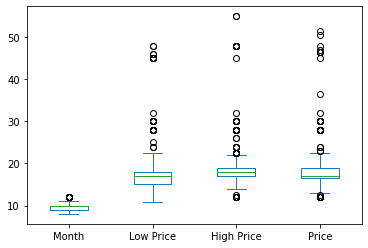

In [78]:
new_pumpkins.plot(kind = 'box')

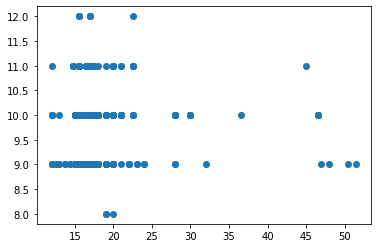

In [79]:
plt.scatter(new_pumpkins['Price'] , new_pumpkins['Month'])
plt.show()

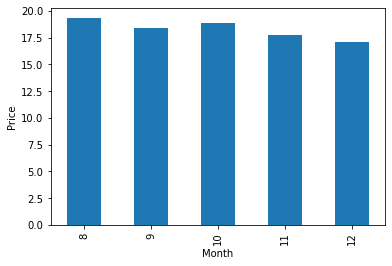

In [80]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind = 'bar')
plt.ylabel('Price')
plt.show()

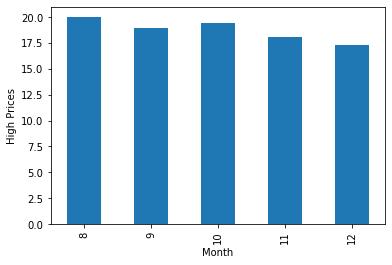

In [81]:
new_pumpkins.groupby(['Month'])['High Price'].mean().plot(kind = 'bar')
plt.ylabel('High Prices')
plt.show()

In [82]:
new_pumpkins.columns

Index(['Month', 'Variety', 'City', 'Package', 'Low Price', 'High Price',
       'Price'],
      dtype='object')

In [83]:
# calculate day of year
from datetime import datetime
new_pumpkins['DOY'] = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

C:\Users\ujjwa\AppData\Local\Temp\ipykernel_3880\198544210.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_pumpkins['DOY'] = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)


In [84]:
new_pumpkins.head()

,Month,Variety,City,Package,Low Price,High Price,Price,DOY
70,9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,15.0,267
71,9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,18.0,267
72,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,18.0,274
73,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,17.0,274
74,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,15.0,281


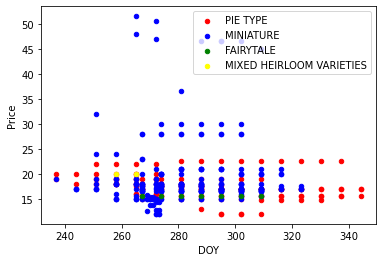

In [85]:
ax=None
colors = ['red','blue','green','yellow']
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    df = new_pumpkins[new_pumpkins['Variety']==var]
    ax = df.plot.scatter('DOY','Price',ax=ax,c=colors[i],label = var)

<AxesSubplot:xlabel='DOY', ylabel='Price'>

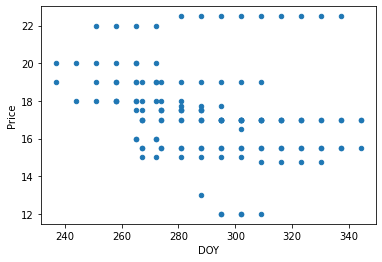

In [87]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
pie_pumpkins.plot.scatter('DOY','Price') 

In [89]:
pie_pumpkins.dropna(inplace=True)
pie_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 70 to 1630
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    int32  
 1   Variety     144 non-null    object 
 2   City        144 non-null    object 
 3   Package     144 non-null    object 
 4   Low Price   144 non-null    float64
 5   High Price  144 non-null    float64
 6   Price       144 non-null    float64
 7   DOY         144 non-null    int64  
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 9.6+ KB


C:\Users\ujjwa\AppData\Local\Temp\ipykernel_3880\3144308612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_pumpkins.dropna(inplace=True)


In [91]:
X = pie_pumpkins['DOY'].values.reshape((-1,1))
y = pie_pumpkins['Price']

In [92]:
X_test , X_train , y_test , y_train = model_selection.train_test_split(X,y, test_size = 0.33); 

In [93]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [98]:
pred  = model.predict(X_test)

In [100]:
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 2.29 (13.1%)


In [102]:
score = model.score(X_train,y_train)
print('Model determination: ', score)

Model determination:  0.07716630378073852


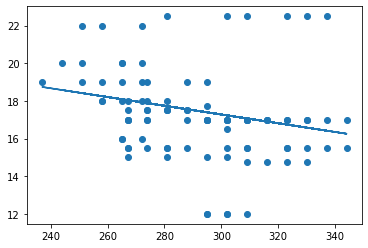

In [103]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

In [120]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())

pipeline.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [121]:
pred2 = pipeline.predict(X_test)

In [122]:
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(y_test,pred2))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred2)*100:3.3}%)')

Mean error: 2.25 (12.9%)


In [123]:
score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Model determination:  0.08775990776741405


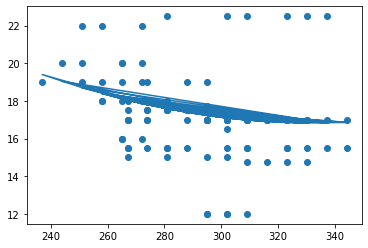

In [124]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred2)